## **Customer Segmentation - Mall Customers data set**

Data: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

___________________________________________________________________________________________________________________________

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import researchpy as rp
import scipy.stats as stats
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import RobustScaler

___________________________________________________________________________________________________________________________

#### **1. Data Exploration**

**<u>General</u>**

In [67]:
df = pd.read_csv('data/customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
df['CustomerID'].nunique()

200

In [69]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* <span style="color:#ed8315">No double entries for the same customer</span>
* <span style="color:#ed8315">No missing values</span>
* <span style="color:#ed8315">Customer ID not needed (drop from data set)</span>
* <span style="color:#ed8315">**As Spending_score is the feature representing customer bahaviour, I will explore the other features in relation to it**</span>

In [70]:
# Drop ID Column
df = df.drop(['CustomerID'], axis = 1)

In [71]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


                            ------------------------------------------------------

**<u>Distribution of Variables</u>**

***Gender***

In [72]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:>

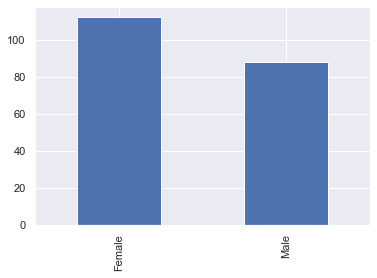

In [73]:
df['Gender'].value_counts().plot(kind='bar')

***Age Distribution***

c:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


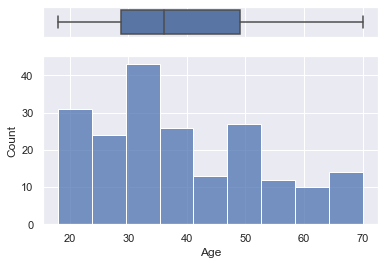

In [77]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,  gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['Age'], ax=ax_box)
sns.histplot(data=df, x='Age', ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

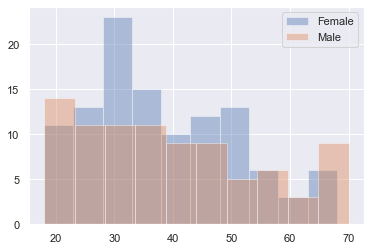

In [84]:
df['Age'].groupby(df['Gender']).hist(alpha=0.4, legend=True)

In [79]:
df['Age'].groupby(df['Gender']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


***Income Distribution***

c:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


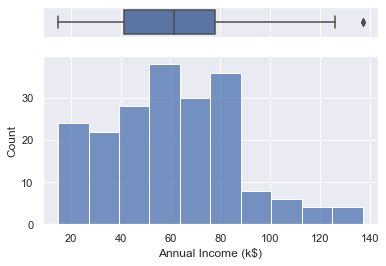

In [85]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,  gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['Annual Income (k$)'], ax=ax_box)
sns.histplot(data=df, x='Annual Income (k$)', ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Annual Income (k$), dtype: object

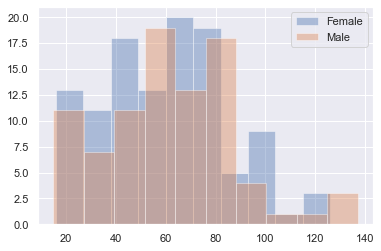

In [88]:
df['Annual Income (k$)'].groupby(df['Gender']).hist(alpha=0.4, legend=True)

In [87]:
df['Annual Income (k$)'].groupby(df['Gender']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


***Spending Score Distribution***

c:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


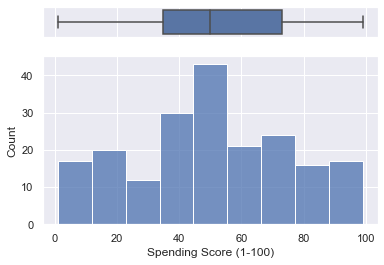

In [90]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,  gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['Spending Score (1-100)'], ax=ax_box)
sns.histplot(data=df, x='Spending Score (1-100)', ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Spending Score (1-100), dtype: object

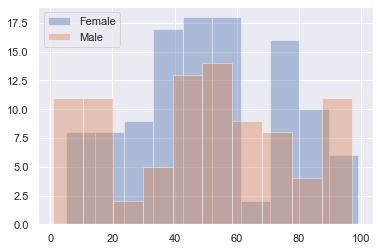

In [89]:
df['Spending Score (1-100)'].groupby(df['Gender']).hist(alpha=0.4, legend=True)

In [91]:
df['Spending Score (1-100)'].groupby(df['Gender']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


* <span style="color:#ed8315">Distrubution of the three continuous variables does not seem to have a specific shape</span>
* <span style="color:#ed8315">The distribution shape for all variables **seems to be** the similar for both Genders</span>
* <span style="color:#ed8315">This could indicate that Gender is not a significant feature here - confirm with statistical tests and keep in mind while checking correlations </span>

                            ------------------------------------------------------

**<u>Statistical tests for Gender</u>**

In [92]:
# 'Age'
rp.ttest(group1= df['Age'][df['Gender'] == 'Male'], group1_name= "Male",
         group2= df['Age'][df['Gender'] == 'Female'], group2_name= "Female")

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0      Male   88.0  39.806818  15.514812  1.653884  36.519544  43.094093
 1    Female  112.0  38.098214  12.644095  1.194755  35.730728  40.465701
 2  combined  200.0  38.850000  13.969007  0.987758  36.902184  40.797816,
               Independent t-test   results
 0  Difference (Male - Female) =     1.7086
 1          Degrees of freedom =   198.0000
 2                           t =     0.8581
 3       Two side test p value =     0.3919
 4      Difference < 0 p value =     0.8041
 5      Difference > 0 p value =     0.1959
 6                   Cohen's d =     0.1222
 7                   Hedge's g =     0.1218
 8               Glass's delta =     0.1101
 9                 Pearson's r =     0.0609)

<span style="color:#ed8315">>>> No significant difference</span>

In [93]:
# 'Annual Income (k$)'
rp.ttest(group1= df['Annual Income (k$)'][df['Gender'] == 'Male'], group1_name= "Male",
         group2= df['Annual Income (k$)'][df['Gender'] == 'Female'], group2_name= "Female")

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0      Male   88.0  62.227273  26.638373  2.839660  56.583141  67.871405
 1    Female  112.0  59.250000  26.011952  2.457898  54.379510  64.120490
 2  combined  200.0  60.560000  26.264721  1.857196  56.897690  64.222310,
               Independent t-test   results
 0  Difference (Male - Female) =     2.9773
 1          Degrees of freedom =   198.0000
 2                           t =     0.7950
 3       Two side test p value =     0.4276
 4      Difference < 0 p value =     0.7862
 5      Difference > 0 p value =     0.2138
 6                   Cohen's d =     0.1133
 7                   Hedge's g =     0.1128
 8               Glass's delta =     0.1118
 9                 Pearson's r =     0.0564)

<span style="color:#ed8315">>>> No significant difference</span>

In [94]:
# 'Spending Score (1-100)'
rp.ttest(group1= df['Spending Score (1-100)'][df['Gender'] == 'Male'], group1_name= "Male",
         group2= df['Spending Score (1-100)'][df['Gender'] == 'Female'], group2_name= "Female")

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0      Male   88.0  48.511364  27.896770  2.973806  42.600603  54.422124
 1    Female  112.0  51.526786  24.114950  2.278649  47.011491  56.042080
 2  combined  200.0  50.200000  25.823522  1.825999  46.599210  53.800790,
               Independent t-test   results
 0  Difference (Male - Female) =    -3.0154
 1          Degrees of freedom =   198.0000
 2                           t =    -0.8190
 3       Two side test p value =     0.4137
 4      Difference < 0 p value =     0.2069
 5      Difference > 0 p value =     0.7931
 6                   Cohen's d =    -0.1167
 7                   Hedge's g =    -0.1162
 8               Glass's delta =    -0.1081
 9                 Pearson's r =     0.0581)

<span style="color:#ed8315">>>> No significant difference</span>

                            ------------------------------------------------------

**<u>Relations between the continuous variables</u>**

<AxesSubplot:>

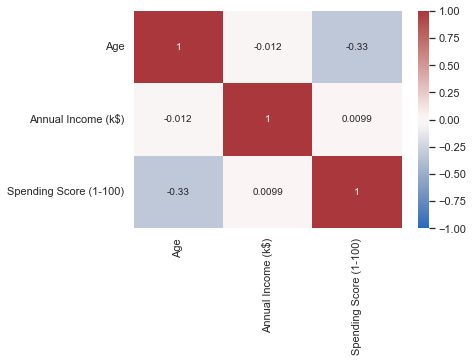

In [95]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, cmap="vlag", annot_kws={"size":10})

***Relation pattern between - Age and Annual_Income***

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

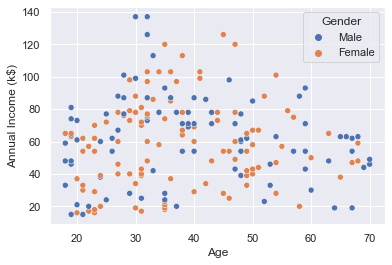

In [96]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', legend=True, hue='Gender')

* <span style="color:#ed8315">Low correlation (-0.012), no apparent pattern</span>

***Relation pattern between - Age and Spending_Score***

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

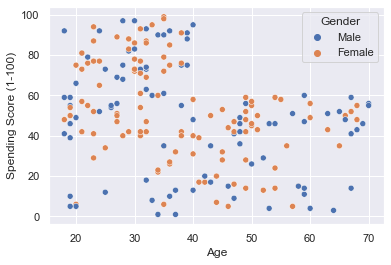

In [97]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', legend=True, hue='Gender')

* <span style="color:#ed8315">Some Correlation (-0.33)</span>
* <span style="color:#ed8315">Visual pattern: younger customers (0-35/40) are more likely to have high spending-scores, older customer (40+) are more likely to have a lower score</span>

In [98]:
# Check significance of correlation
pearsonr(df['Age'], df['Spending Score (1-100)'])

(-0.32722684603909, 2.2502957035653357e-06)

***Relation pattern between - Annual_encome and Spending_Score***

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

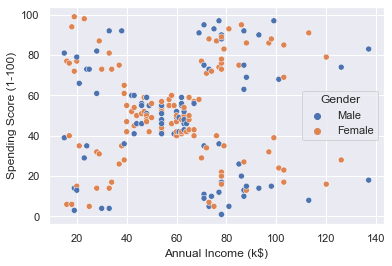

In [99]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', legend=True, hue='Gender')

* <span style="color:#ed8315">Low correlation (0.0009)</span>
* <span style="color:#ed8315">Visual pattern: There seems to be **5 clusters** (1. low-income/low-score, 2. low-income/high-score, 3. average-income/average-score, 4. high-income/low-score, 5. high-income/high-score)</span>

* <span style="color:#ed8315">**Gender - seems to be insignificant also in this exploration and therefore can be dropped from analysis**</span>

***3D Plot of the three continuous variables (Income, Score, Age)***

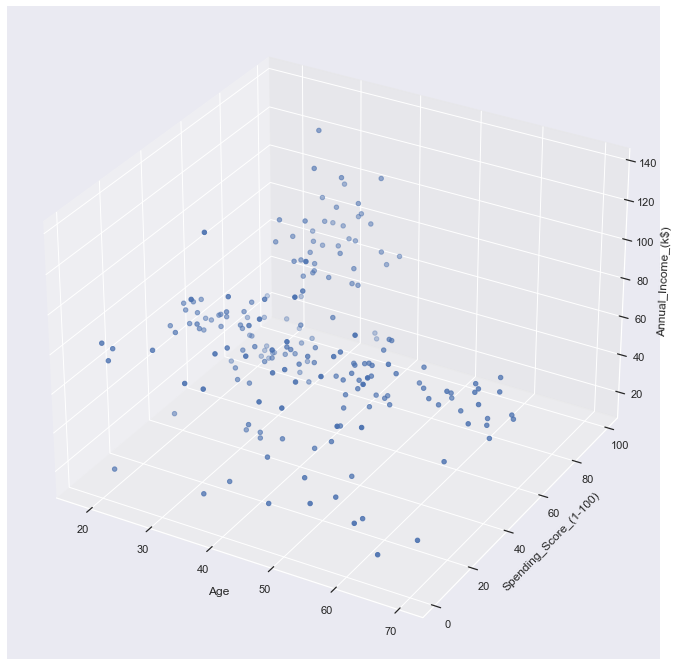

In [100]:
fig = plt.figure(figsize = (15, 12))

ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Spending Score (1-100)']
z = df['Annual Income (k$)']

ax.set_xlabel("Age")
ax.set_ylabel("Spending_Score_(1-100)")
ax.set_zlabel("Annual_Income_(k$)")

ax.scatter(x, y, z)
plt.show()

___________________________________________________________________________________________________________________________